## World Happiness Case Study
---
Leopoldine Mirtil

### Objective
The goal of this project is to clean, analyze and visualize the world happiness data in order to complete the tasks.

### Tasks
* Identify the overall top and bottom 10 ranked happiest countries

* Identify the regions that consistently contain the top & bottom-ranked happiest countries.

* Which countries have experienced the highest happiness increase and decrease between 2015-2019? 

* Analyze the relationship between overall happiness and social metrics(economy, family, health, trust, generosity, freedom, and dystopia residual).

### Source Data
The data used in this analysis was made publicly available by Sustainable Development Solutions Network on [Kaggle.com](https://www.kaggle.com/datasets/unsdsn/world-happiness). It reports the  the extent of which several factors (economy, family, health, trust, generosity, freedom, dystopia residual) contribute to the overall happiness score and ranking of countries from 2015 to 2019. 

## Step 1 - Get Data

### Load Packages & Import Data

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

y15 = pd.read_csv("World Happiness Report Data/2015.csv")
y16 = pd.read_csv("World Happiness Report Data/2016.csv")
y17 = pd.read_csv("World Happiness Report Data/2017.csv")
y18 = pd.read_csv("World Happiness Report Data/2018.csv")
y19 = pd.read_csv("World Happiness Report Data/2019.csv")

### Inspect Data


In [5]:
#check df sizes: (row, col)
print('2015:', y15.shape) 
print('2016:', y16.shape)
print('2017:', y17.shape)
print('2018:', y18.shape)
print('2019:', y19.shape)

2015: (158, 12)
2016: (157, 13)
2017: (155, 12)
2018: (156, 9)
2019: (156, 9)


In [12]:
#list of column names 
print("2015:", list(y15.columns)) 
print("2016:", list(y16.columns))
print("2017:", list(y17.columns))
print("2018:", list(y18.columns))
print("2019:", list(y19.columns))

2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2019: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social sup

## Step 2 - Clean & Manipulate Data

In [13]:
#will only use 2015-2017 datasets due to missing Dystopia Residual col in 2018 & 2019
y15 = y15.drop(columns=['Standard Error'])
y16 = y16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'])
y17 = y17.drop(columns=['Whisker.high', 'Whisker.low'])


#rename to match 2015 & 2016
y17 = y17.rename(columns={'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score', 
                          'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 'Health..Life.Expectancy.':'Health (Life Expectancy)', 
                          'Trust..Government.Corruption.':'Trust (Government Corruption)', 'Dystopia.Residual':'Dystopia Residual'}) 


#add year columns 
y15['Year'] = 2015
y16['Year'] = 2016
y17['Year'] = 2017


### Adjust Column Orders

In [16]:
#move year column to first position for 2015 & 2016 files
first_15 = y15.pop('Year')
y15.insert(0, 'Year', first_15)

first_16 = y16.pop('Year')
y16.insert(0, 'Year', first_16)

#change order of remaining dfs to closely match those of 2015 & 2016
co17 = ['Year', 'Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
             'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

#change column order
y17 = y17[co17]

### Check for Missing Values

In [18]:
y15.isna().sum()

Year                             0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [19]:
y16.isna().sum()

Year                             0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [20]:
y17.isna().sum()

Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Merge Data Files

In [36]:
#create list of dfs 
df_list = [y15, y16, y17] 

#combine dfs 
world_df = pd.concat(df_list, join='outer').reset_index(drop=True)

#view new df
display(world_df)

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,2015,Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,2015,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,2015,Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,2015,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
...,...,...,...,...,...,...,...,...,...,...,...,...
465,2017,Rwanda,NaN,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061
466,2017,Syria,NaN,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574
467,2017,Tanzania,NaN,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130
468,2017,Burundi,NaN,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024


### Fill Missing Region Values
#### Create Dictionary from Data Frame Columns

In [ ]:
#create list from Country Column
country_list = list(world_df['Country'])

#create list with unique values of countries
countries = []

for x in country_list:
    if x not in countries:
        countries.append(x)

#sort list alphabetically 
countries = sorted(list(countries))

#replace  following Country values from list: 
vals_replace = {'Hong Kong S.A.R., China' : 'Hong Kong',
                'Somaliland region' : 'Somaliland Region',
                'Taiwan Province of China' : 'Taiwan'}

#update df
world_df = world_df.replace({'Country': vals_replace}) 


#create dict with unique key & vals by grouping pairs
w_dict = world_df.groupby('Country')['Region'].unique().apply(list).to_dict()

#update dict for keys w/ nan values: North Macedonia & Gambia
w_dict.update({'North Macedonia': ['Central and Eastern Europe'], 'Gambia': ['Sub-Saharan Africa']})


#initialize lists for dict
key = []
val = []

#update lists for unique key-value pairs 
for x in list(w_dict.items()):
    k = x[0]
    v = x[1][0] 
    key.append(k) 
    val.append(v)

#create final dict w/key-value lists
location = dict(zip(key, val))

#### Replace NA Values with Dictionary

In [39]:
#current NA count
world_df['Region'].isna().sum()

155

In [40]:
### replace missing values in Region w/dictionary
world_df['Region'] = world_df['Country'].map(location)

## confirm change 
world_df['Region'].isna().sum()

0

In [41]:
# view complete df 
display(world_df)

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,2015,Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,2015,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,2015,Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,2015,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
...,...,...,...,...,...,...,...,...,...,...,...,...
465,2017,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061
466,2017,Syria,Middle East and Northern Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574
467,2017,Tanzania,Sub-Saharan Africa,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130
468,2017,Burundi,Sub-Saharan Africa,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024


### Export Modifed Data Frame

In [43]:
world_df.to_csv('world_happiness_2015_2017.csv', index=False)   

## Step 3 - Data Analysis

In [44]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           470 non-null    int64  
 1   Country                        470 non-null    object 
 2   Region                         470 non-null    object 
 3   Happiness Rank                 470 non-null    int64  
 4   Happiness Score                470 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 4

### Statistical Summary 

In [45]:
#summary of numerical/non-year columns
world_df.iloc[:,4:12].describe().round(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,470.00,470.00,470.00,470.00,470.00,470.00,470.00,470.00
mean,5.37,0.93,0.99,0.58,0.40,0.13,0.24,2.09
std,1.14,0.42,0.32,0.24,0.15,0.11,0.13,0.57
min,2.69,0.00,0.00,0.00,0.00,0.00,0.00,0.33
25%,4.51,0.61,0.79,0.40,0.30,0.06,0.15,1.74
50%,5.28,1.00,1.03,0.63,0.42,0.10,0.22,2.09
75%,6.23,1.25,1.23,0.77,0.52,0.17,0.32,2.46
max,7.59,1.87,1.61,1.03,0.67,0.55,0.84,3.84


### Country Count per Region

In [48]:
#select regions and matching countries 
reg_n = world_df.groupby('Region')['Country'].unique().to_frame().reset_index() 

#get country count from list & replace values
reg_n['Country'] = reg_n['Country'].str.len() 

#sort df by value
reg_n.rename(columns={'Country':'Country No.'}).sort_values('Country No.').reset_index(drop=True)

,Region,Country No.
0,Australia and New Zealand,2
1,North America,2
2,Eastern Asia,6
3,Southern Asia,7
4,Southeastern Asia,9
5,Middle East and Northern Africa,20
6,Western Europe,21
7,Latin America and Caribbean,24
8,Central and Eastern Europe,29
9,Sub-Saharan Africa,43


### Happiness Rank Analysis

##### Overall Top & Bottom 10 Ranked Happiest Countries by Average Happiness Rank

In [51]:
#top 10 by avg happiness rank
world_df.groupby(['Country', 'Region'])['Happiness Rank'].mean().round(2).nsmallest(10).reset_index()

,Country,Region,Happiness Rank
0,Denmark,Western Europe,2.00
1,Switzerland,Western Europe,2.33
2,Iceland,Western Europe,2.67
3,Norway,Western Europe,3.00
4,Finland,Western Europe,5.33
5,Canada,North America,6.00
6,Netherlands,Western Europe,6.67
7,New Zealand,Australia and New Zealand,8.33
8,Sweden,Western Europe,9.00
9,Australia,Australia and New Zealand,9.67


In [52]:
#bot 10 by avg happiness rank
world_df.groupby(['Country', 'Region'])['Happiness Rank'].mean().round(2).nlargest(10).reset_index()

,Country,Region,Happiness Rank
0,Burundi,Sub-Saharan Africa,156.00
1,Syria,Middle East and Northern Africa,154.67
2,Togo,Sub-Saharan Africa,154.33
3,Rwanda,Sub-Saharan Africa,152.33
4,Central African Republic,Sub-Saharan Africa,151.50
5,Benin,Sub-Saharan Africa,150.33
6,Guinea,Sub-Saharan Africa,150.00
7,Afghanistan,Southern Asia,149.33
8,Tanzania,Sub-Saharan Africa,149.33
9,Madagascar,Sub-Saharan Africa,146.33


#### Top & Bottom 10 Ranked Happiest Countries by Year

In [53]:
#annual top 10s 
tops10=world_df.loc[world_df['Happiness Rank']<=10, ('Year', 'Happiness Rank', 'Country','Region')].reset_index(drop=True)
t10 = tops10.melt(id_vars=['Happiness Rank', 'Year'], value_vars=['Country', 'Region'], value_name='Geography', var_name='Area').sort_values(['Happiness Rank', 'Year'])
yrs_top10 = t10.pivot(index='Happiness Rank', columns=['Year','Area'])

#remove geo header
yrs_top10.columns = yrs_top10.columns.droplevel(0) 
yrs_top10

Year                   2015                                    2016  \
Area                Country                     Region      Country   
Happiness Rank                                                        
1               Switzerland             Western Europe      Denmark   
2                   Iceland             Western Europe  Switzerland   
3                   Denmark             Western Europe      Iceland   
4                    Norway             Western Europe       Norway   
5                    Canada              North America      Finland   
6                   Finland             Western Europe       Canada   
7               Netherlands             Western Europe  Netherlands   
8                    Sweden             Western Europe  New Zealand   
9               New Zealand  Australia and New Zealand    Australia   
10                Australia  Australia and New Zealand       Sweden   

Year                                              2017  \
Area                               Region      Country   
Happiness Rank                                           
1                          Western Europe       Norway   
2                          Western Europe      Denmark   
3                          Western Europe      Iceland   
4                          Western Europe  Switzerland   
5                          Western Europe      Finland   
6                           North America  Netherlands   
7                          Western Europe       Canada   
8               Australia and New Zealand  New Zealand   
9               Australia and New Zealand       Sweden   
10                         Western Europe    Australia   

Year                                       
Area                               Region  
Happiness Rank                             
1                          Western Europe  
2                          Western Europe  
3                          Western Europe  
4                          Western Europe  
5                          Western Europe  
6                          Western Europe  
7                           North America  
8               Australia and New Zealand  
9                          Western Europe  
10              Australia and New Zealand

In [54]:
#annual bottom 10 countries and regions 
bot10s = world_df[['Year', 'Happiness Rank', 'Country', 'Region']].groupby(['Year']).tail(10).reset_index(drop=True)

#replace existing Happiness Rank w/ range seq (1-10) seq
##create rank list for 1 - 10
rk_range = list(range(1, 11))

##repeat list x3(per yr) in order and w/nums seperated by commas
ranks = [n for n in np.tile(rk_range, 3)] 

##replace existing Happiness Rank vals with the (1-10) seq
bot10s['Happiness Rank'] = ranks

b10 = bot10s.melt(id_vars=['Happiness Rank', 'Year'], value_vars=['Country', 'Region'], value_name='Geography', var_name='Area').sort_values(['Year', 'Happiness Rank'], ascending=[True, True])

yrs_bot10  = b10.pivot(index='Happiness Rank', columns=['Year','Area'])

#remove header
yrs_bot10.columns = yrs_bot10.columns.droplevel(0) 

display(yrs_bot10)

Year                    2015                                          2016  \
Area                 Country                           Region      Country   
Happiness Rank                                                               
1                       Chad               Sub-Saharan Africa   Madagascar   
2                     Guinea               Sub-Saharan Africa     Tanzania   
3                Ivory Coast               Sub-Saharan Africa      Liberia   
4               Burkina Faso               Sub-Saharan Africa       Guinea   
5                Afghanistan                    Southern Asia       Rwanda   
6                     Rwanda               Sub-Saharan Africa        Benin   
7                      Benin               Sub-Saharan Africa  Afghanistan   
8                      Syria  Middle East and Northern Africa         Togo   
9                    Burundi               Sub-Saharan Africa        Syria   
10                      Togo               Sub-Saharan Africa      Burundi   

Year                                                                 2017  \
Area                                     Region                   Country   
Happiness Rank                                                              
1                            Sub-Saharan Africa                     Yemen   
2                            Sub-Saharan Africa               South Sudan   
3                            Sub-Saharan Africa                   Liberia   
4                            Sub-Saharan Africa                    Guinea   
5                            Sub-Saharan Africa                      Togo   
6                            Sub-Saharan Africa                    Rwanda   
7                                 Southern Asia                     Syria   
8                            Sub-Saharan Africa                  Tanzania   
9               Middle East and Northern Africa                   Burundi   
10                           Sub-Saharan Africa  Central African Republic   

Year                                             
Area                                     Region  
Happiness Rank                                   
1               Middle East and Northern Africa  
2                            Sub-Saharan Africa  
3                            Sub-Saharan Africa  
4                            Sub-Saharan Africa  
5                            Sub-Saharan Africa  
6                            Sub-Saharan Africa  
7               Middle East and Northern Africa  
8                            Sub-Saharan Africa  
9                            Sub-Saharan Africa  
10                           Sub-Saharan Africa

#### Most Frequent Region Among Annual Ranked Countries

In [55]:
#freq region in annual top 10s
tops10['Region'].mode()

0    Western Europe
Name: Region, dtype: object

In [56]:
#freq region in annual bottom 10s
bot10s['Region'].mode()

0    Sub-Saharan Africa
Name: Region, dtype: object

### Annual Percent Changes 

##### Annual Percent Changes in Social Metrics

In [57]:
## filter df for total metrics by year
yr_metrics = world_df.iloc[:,[0,4, 5, 6, 7, 8, 9, 10,11]].groupby('Year').sum().reset_index()

#transpose df
all_mets =  yr_metrics.T 
#convert year row to col headers 
all_mets.columns = [int(x) for x in all_mets.iloc[0]] 
 #drop unneeded year row 
all_yrs = all_mets.drop(all_mets.index[0])
#reset index and rename cols
annual_df = all_yrs.reset_index().rename(columns={'index':'Metrics'}) 

#calc perc change from 2015-2019 
ch16 = list((((annual_df[2016]-annual_df[2015])/annual_df[2015])*100))
ch17 = list((((annual_df[2017]-annual_df[2016])/annual_df[2016])*100))
all_sm = list((((annual_df[2017]-annual_df[2015])/annual_df[2015])*100))

data = {
    2016: ch16,
    2017: ch17,
    'Overall': all_sm}

#create list of metrics
metrics_list =[x for x in annual_df['Metrics']]

#create perc change df
perc_ch = pd.DataFrame(data, index=metrics_list).map("{:,.2f}%".format).replace('nan%', ' ')
perc_ch

,2016,2017,Overall
Happiness Score,-0.51%,-1.79%,-2.30%
Economy (GDP per Capita),12.02%,1.92%,14.17%
Family,-20.43%,47.90%,17.69%
Health (Life Expectancy),-12.09%,-2.39%,-14.18%
Freedom,-13.99%,8.78%,-6.44%
Trust (Government Corruption),-4.65%,-11.68%,-15.79%
Generosity,1.60%,0.45%,2.07%
Dystopia Residual,10.11%,-21.46%,-13.52%


##### Annual Happiness Percent Changes in Regions

In [58]:
#calc perc change of happiness score by region
reg_yrs = world_df.iloc[:,[0,2, 4]].groupby(['Region', 'Year']).sum().reset_index()

#pivot data 
reg_pivot = reg_yrs.pivot(index='Region', columns='Year')

#edit col headers to only show year
reg_pivot.columns = [2015, 2016, 2017]

#reset index
annual_reg = reg_pivot.reset_index()

#calc annual perc change 
r_ch16 = list((((annual_reg[2016]-annual_reg[2015])/annual_reg[2015])*100))
r_ch17 = list((((annual_reg[2017]-annual_reg[2016])/annual_reg[2016])*100))
all_regs = list((((annual_reg[2017]-annual_reg[2015])/annual_reg[2015])*100))

#combine lists as dict w/ years as key
reg_data = {
    2016: r_ch16,
    2017: r_ch17,
    'Overall': all_regs}

#create region list
reg_list =[x for x in annual_reg['Region']]

#create regional perc change df
reg_perc_ch = pd.DataFrame(reg_data, index=reg_list).map("{:,.2f}%".format)
reg_perc_ch

,2016,2017,Overall
Australia and New Zealand,0.53%,-0.33%,0.19%
Central and Eastern Europe,0.71%,0.73%,1.44%
Eastern Asia,-0.04%,0.40%,0.36%
Latin America and Caribbean,8.33%,-10.50%,-3.04%
Middle East and Northern Africa,-5.37%,-0.30%,-5.65%
North America,-0.26%,-1.37%,-1.63%
Southeastern Asia,0.40%,-9.35%,-8.98%
Southern Asia,-0.38%,1.43%,1.04%
Sub-Saharan Africa,-6.50%,2.02%,-4.61%
Western Europe,-0.06%,0.27%,0.21%


##### Annual Happiness Percent Changes in Countries

In [65]:
#display all rows and columns
pd.set_option('display.max_rows', None)

#annual percent change of happiness score by years and countries
co_yrs = world_df[['Country', 'Year', 'Happiness Score']].sort_values(['Country', 'Year']).reset_index(drop=True)

#pivot data  
co_pivot = co_yrs.pivot(index='Country', columns='Year')

#edit col headers to only show year
co_pivot.columns = [2015, 2016, 2017]

#reset index
annual_co = co_pivot.reset_index()

#calc annual perc change 
c_ch16 = list((((annual_co[2016]-annual_co[2015])/annual_co[2015])*100))
c_ch17 = list((((annual_co[2017]-annual_co[2016])/annual_co[2016])*100))
all_ch = list((((annual_co[2017]-annual_co[2015])/annual_co[2015])*100))

#combine country lists as dict w/ years as key
co_data = {
    2016: c_ch16,
    2017: c_ch17,
    'Overall':all_ch}

#create country list for new df
co_list =[x for x in annual_co['Country']]

#create country perc change df and replace NA values 
co_perc_ch = pd.DataFrame(co_data, index=co_list).reset_index().rename(columns={'index':'Country'}).fillna(0)

#convert year cols to float
total_chs_co = co_perc_ch.convert_dtypes()


#format df: round values & add percent symbol 
multi_yr_percs = total_chs_co.copy().style.format({2016: '{:,.2f}%'.format,
                                                   2017: '{:,.2f}%'.format,
                                                  'Overall': '{:,.2f}%'.format})

#view data
display(multi_yr_percs)

,Country,2016,2017,Overall
0,Afghanistan,-6.01%,12.92%,6.13%
1,Albania,-6.13%,-0.24%,-6.35%
2,Algeria,13.38%,-7.60%,4.76%
3,Angola,-4.14%,-1.84%,-5.90%
4,Argentina,1.16%,-0.77%,0.38%
5,Armenia,0.23%,0.37%,0.60%
6,Australia,0.40%,-0.40%,-0.00%
7,Austria,-1.13%,-1.59%,-2.69%
8,Azerbaijan,1.52%,-1.08%,0.42%
9,Bahrain,4.33%,-2.11%,2.13%


#### Maximum and Minimum Percent Changes

In [66]:
#filter df for countries and overall changes
co_percents = total_chs_co[['Country', 'Overall']]

#max
display(co_percents.loc[co_percents['Overall'].idxmax()])

#min
display(co_percents.loc[co_percents['Overall'].idxmin()])

Country         Togo
Overall    23.106724
Name: 146, dtype: object

Country    Central African Republic
Overall                  -26.780857
Name: 26, dtype: object

## Step 4 - Visualizations

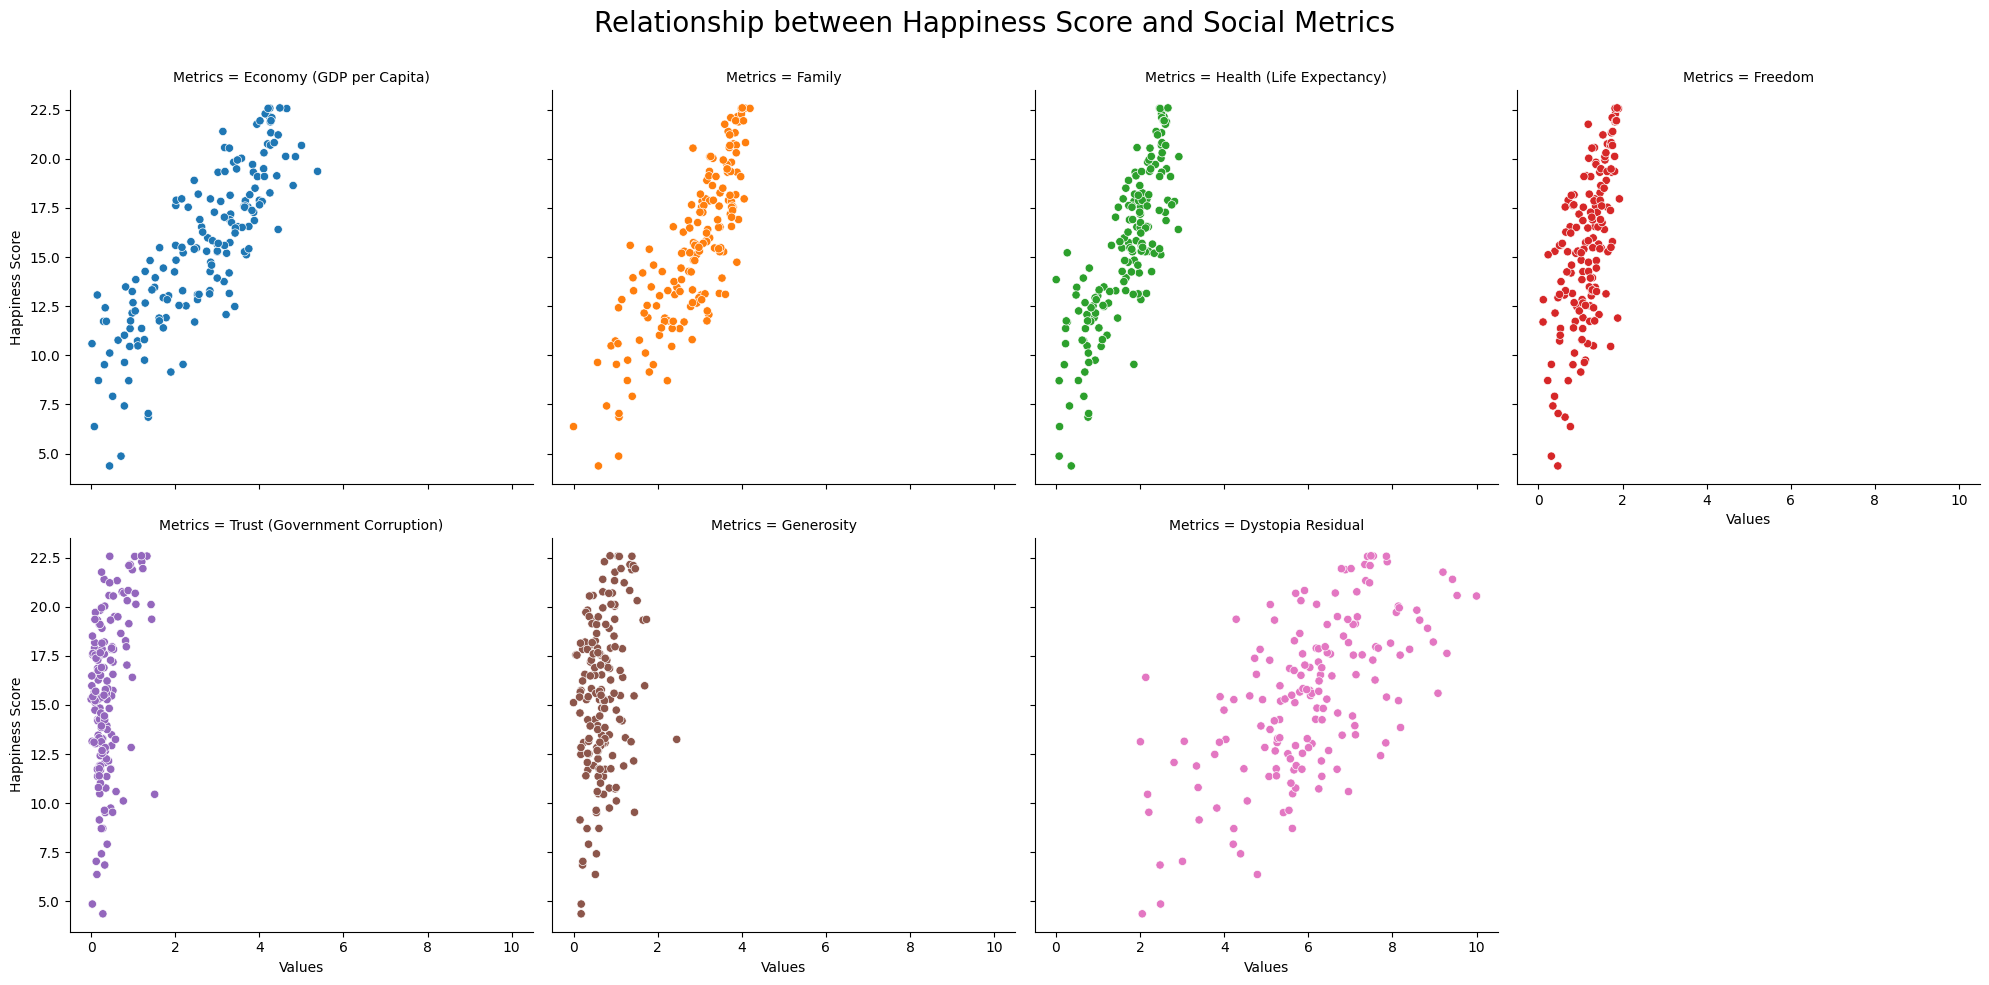

In [93]:
#filter data for plot
scatter_df = world_df.iloc[:,[1,4, 5, 6, 7, 8, 9, 10, 11]].groupby('Country').sum().reset_index()

#pivot df
scatter_pivot = scatter_df.melt(id_vars=['Country', 'Happiness Score'], var_name='Metrics', value_name='Values')

#create scatterplot & grid by metrics
sns.relplot(scatter_pivot, x='Values', y='Happiness Score', hue='Metrics', col='Metrics', col_wrap=4, legend=False)
plt.suptitle('Relationship between Happiness Score and Social Metrics', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

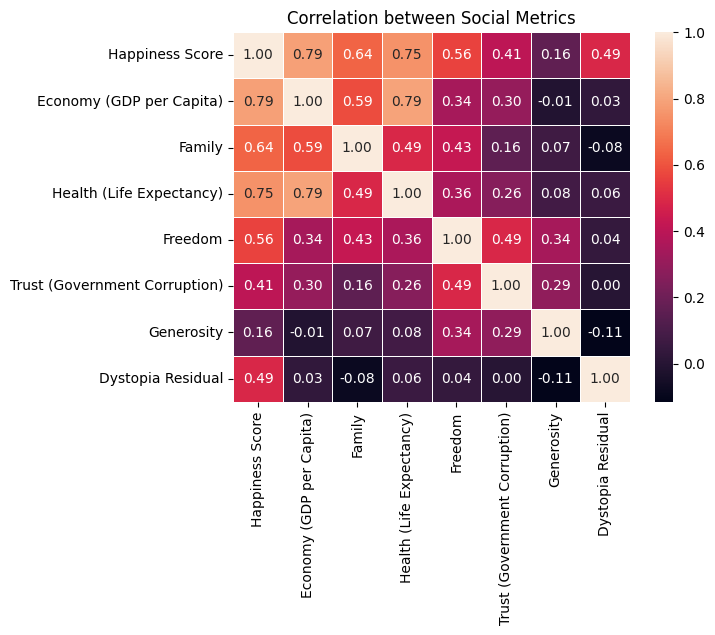

In [91]:
sns.heatmap(world_df.iloc[:,4:12].corr(), linewidths=0.5, linecolor="white", fmt='.2f', annot=True)
plt.title('Correlation between Social Metrics')
plt.show()

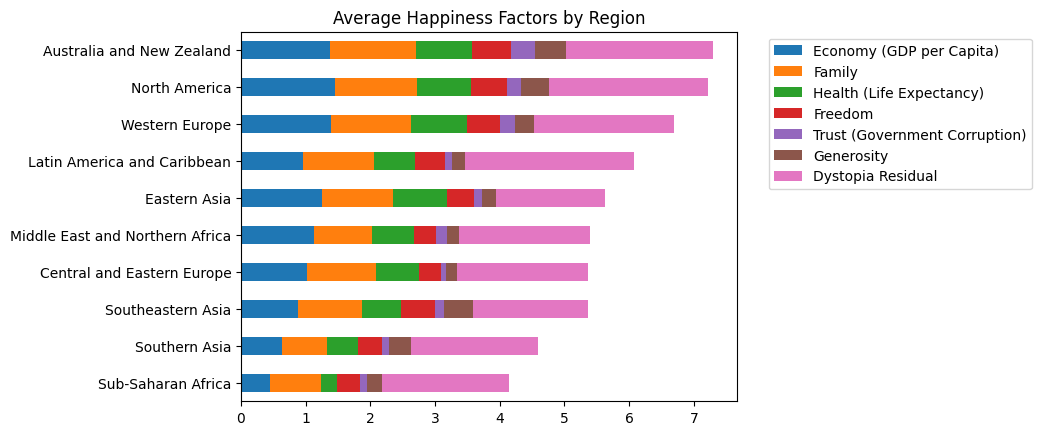

In [89]:
#prep data for chart
reg_df = world_df.iloc[:,[2, 5, 6, 7, 8, 9, 10, 11]].groupby('Region').mean()

# get total of factors
reg_df['Total'] = reg_df.sum(axis=1)

# sort df by desc order by total
reg_df.sort_values('Total', inplace=True)

#plot 
reg_df.iloc[:,[0, 1, 2, 3, 4, 5, 6]].plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Happiness Factors by Region')
plt.ylabel('')
plt.show()


In [96]:
#prep dfs
#top 10 happiest country by avg happiness rank
tops = world_df.groupby(['Country', 'Region'])[['Happiness Rank', 'Happiness Score']].mean().nsmallest(10, 'Happiness Rank').reset_index()

tops['Average Happiness Rank'] = tops['Happiness Rank']
tops['Happiness Rank'] = list(range(1,11))


#bottom 10 happiest country by avg happiness rank
bots = world_df.groupby(['Country', 'Region'])[['Happiness Rank', 'Happiness Score']].mean().nlargest(10, 'Happiness Rank').reset_index()

bots['Average Happiness Rank'] = bots['Happiness Rank']
bots['Happiness Rank'] = list(range(1,11))

#merge both dfs
ranks_df = pd.concat([tops,bots], join='outer').reset_index(drop=True).rename(columns={'Happiness Rank': 'Overall Happiness Rank', 'Happiness Score': 'Average Happiness Score'})

#assign colors
rank_colors = ['green' if float(x) > 5 else 'red' for x in ranks_df['Average Happiness Score']]

#plot chart
fig = px.bar(ranks_df, x='Country', y='Average Happiness Score', color=rank_colors, color_discrete_map='identity', 
             custom_data=['Country','Region','Overall Happiness Rank','Average Happiness Rank'],
             title='<b>Overall Top and Bottom 10 Happiest Countries', height=500, width=900)

fig.update_traces(hovertemplate = 
                "<b>Rank: %{customdata[2]}</b><br>" +
                "<b>%{x}</b><br>" +
                "<b>%{customdata[1]}</b><br><br>" +
                "Average Happiness Rank: %{customdata[3]:,.2f}<br>" +
                "Average Happiness Score: %{y:.2f}<br>" +
                "<extra></extra>")
fig.show()

In [95]:
#assign colors
bar_colors = []

for x in total_chs_co['Overall']:
    if x > 0: 
        bar_colors.append('green')
    else: 
        bar_colors.append('red')

#create bar chart of percent changes
fig = px.bar(total_chs_co, x= 'Country', y='Overall', color=bar_colors, color_discrete_map='identity', 
             title='<b>Overall Happiness Percent Changes of Countries', height=700)
fig.update_traces(hovertemplate='%{x}<br>%{y:,.2f}%')
fig.update_xaxes(categoryorder='category ascending', title=None, showticklabels=False)
fig.update_yaxes(title='Percentage Change', ticksuffix='%')
fig.show()